In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
#count null values
df.isnull().sum()
#no null values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [11]:
#count duplicates
df.duplicated().sum()

np.int64(0)

Correlation Matrix and HeatMap

In [12]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


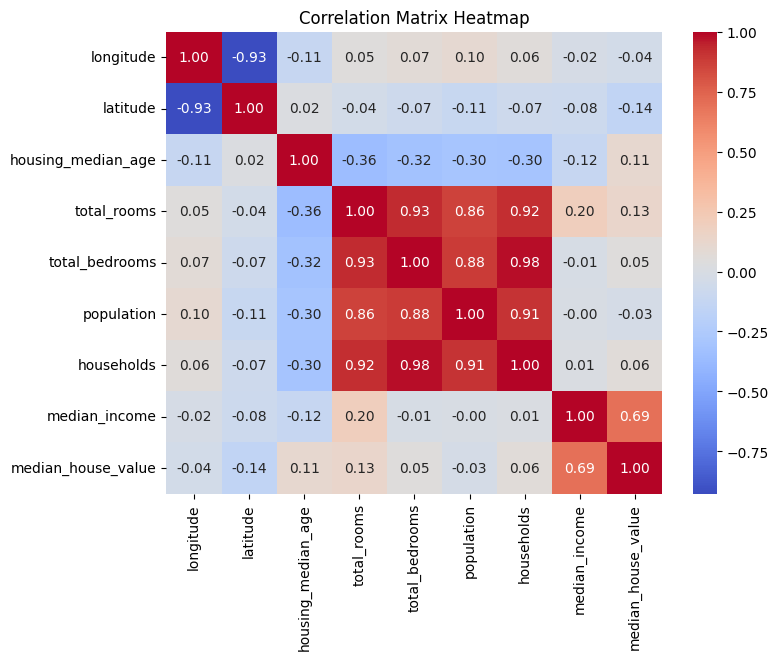

In [11]:
# Compute and display the correlation matrix for numeric columns
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Start Processing for Linear Regression

In [12]:
#DEFINE X
x = df.iloc[:,:-1]
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


Scaled X

Numpy

In [14]:
x = np.array(x)
x_scaled = (x-x.mean(axis=0))/x.std(axis=0)
x =x_scaled

Scikit

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert to numpy array and add bias term
x_scaled = np.array(x_scaled)
stacked_array = np.column_stack((x_scaled, np.ones(len(x_scaled))))

In [15]:
y_target = df["median_house_value"]

*Add bias term to X*

In [16]:
#
x = np.array(x)
#print(x,len(x),len(np.ones(len(x))),df.size//9)
stacked_array = np.column_stack((x,np.ones(len(x))))

In [20]:
print(stacked_array)

[[ 2.619365   -0.67152023 -1.07967114 ... -0.07599796 -1.25254316
   1.        ]
 [ 2.53956878 -0.57326437 -0.76187201 ... -0.09940441 -1.08148298
   1.        ]
 [ 2.4946834  -0.90546278 -0.92077158 ... -0.99925206 -1.17010515
   1.        ]
 ...
 [-2.36291168  2.90780067 -0.92077158 ... -0.11760942 -0.44666313
   1.        ]
 [-2.36291168  2.88908527 -0.76187201 ... -0.06039367 -0.99778717
   1.        ]
 [-2.387848    2.29955006  1.85997083 ... -0.60134255 -0.45536288
   1.        ]]


Closed Form Solution
![normalEquation.png](normalEquation.png)

In [21]:
#print(stacked_array)
transpose = np.transpose(stacked_array)
X= transpose@stacked_array
#X = np.einsum("i j , j l -> i l",transpose,stacked_array)
inv = np.linalg.inv(X)
normal_weights =(inv@transpose)@y_target

In [22]:
print(normal_weights)

[-86499.60728226 -91744.05083061  14483.29860201 -18263.60700749
  49587.33777166 -44178.15153005  17470.57604338  77291.55314914
 207300.91235294]


*Define Functions for gradient descent solution and computation*

In [23]:
def compute_function_normal(x,w):
   return (x@w)

In [24]:
def loss(y,y_pred):
  return np.mean((y-y_pred)**2)
def compute(y,x,w):
  return loss(y,compute_function_normal(x,w))


In [35]:
h = 1e-5
def differentiate(function,y,x,weights,arg): #vector differentiation
  modified_weights = weights.copy()
  modified_weights[arg] += h
  return (function(y,x,modified_weights) - function(y,x,weights))/h
#weights = np.arra
w = np.zeros((normal_weights.shape))
alpha  = 0.01
epochs = 1000
w_ = []
l_ = []
for i in range(epochs):
  grad = np.zeros_like(w)
  for j in range(len(w)):
    grad[j] = differentiate(compute,y_target,stacked_array,w,j)
  w = w-(alpha*grad)
  w_.append(w)
  l_.append(compute(y_target,stacked_array,w))
print(w,len(w))


[-63427.83069611 -68813.55381012  17379.77027893 -13882.37380981
  31818.82858276 -41702.13317871  29521.10671997  78692.9731369
 207300.91381073] 9


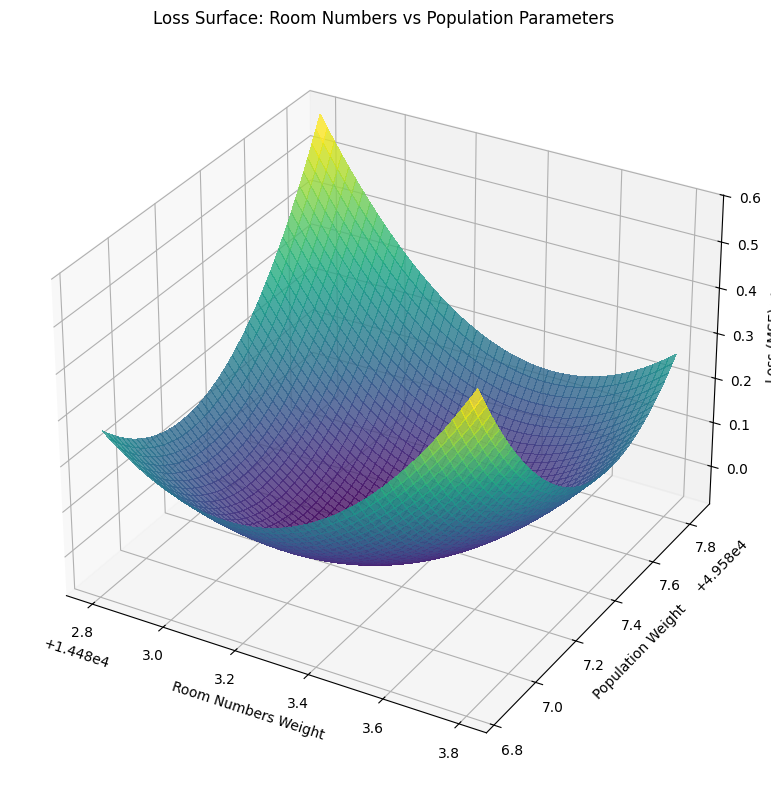

In [123]:
# Complete the loss surface plot using room numbers and population parameters
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

room_idx = 2  
pop_idx = 4   
# Create a grid of parameter values around the optimal weights
w_room_opt = normal_weights[room_idx]
w_pop_opt = normal_weights[pop_idx]
w_room_range = np.linspace(w_room_opt - 0.5, w_room_opt + 0.5, 50)
w_pop_range = np.linspace(w_pop_opt - 0.5, w_pop_opt + 0.5, 50)
W_ROOM, W_POP = np.meshgrid(w_room_range, w_pop_range)
Loss = np.zeros_like(W_ROOM)
for i in range(len(w_room_range)):
    for j in range(len(w_pop_range)):
        temp_weights = normal_weights.copy()
        temp_weights[room_idx] = W_ROOM[j, i]
        temp_weights[pop_idx] = W_POP[j, i]
        y_pred_temp = stacked_array @ temp_weights
        Loss[j, i] = np.mean((y_target - y_pred_temp)**2)

# Create 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W_ROOM, W_POP, Loss, cmap=cm.viridis, 
                      linewidth=0, antialiased=False, alpha=0.8)

ax.set_xlabel('Room Numbers Weight')
ax.set_ylabel('Population Weight')
ax.set_zlabel('Loss (MSE)')
ax.set_title('Loss Surface: Room Numbers vs Population Parameters')
plt.tight_layout()
plt.show()


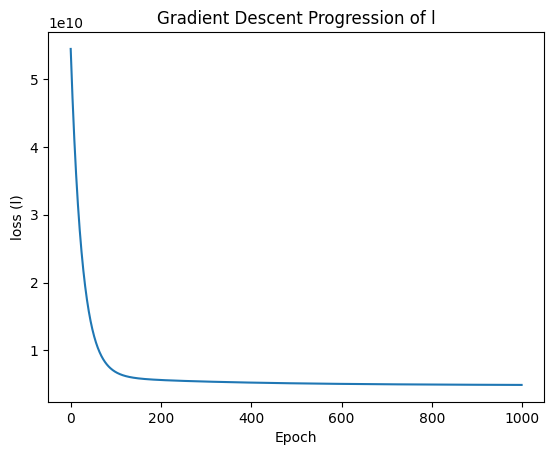

In [31]:
import matplotlib.pyplot as plt

plt.plot(l_)
plt.xlabel('Epoch')
plt.ylabel('loss (l)')
plt.title('Gradient Descent Progression of l')
plt.show()

Use Sklearn

In [113]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(x_scaled, y_target)

print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [-86499.60728226 -91744.05083061  14483.29860201 -18263.60700749
  49587.33777166 -44178.15153005  17470.57604338  77291.55314914]
Intercept: 207300.91235294117


Validate on Test

In [81]:
valid_df = pd.read_csv("california_housing_test.csv")
x_test = np.array(valid_df.iloc[:,:8])
x_test = np.array(x_test)
#x_test = np.column_stack((x_test**2,x_test))
x_scaled_test = (x_test-x_test.mean(axis=0))/x_test.std(axis=0)
x_test =x_scaled_test
x_test = np.column_stack((x_test,np.ones(len(x_test))))
y_test = np.array(valid_df.iloc[:,-1])


Compute Validation Loss

In [54]:
gradient_weights = w
y_test.shape 
y_test.reshape(-1,1)

(3000, 1)

In [70]:
w_ = np.transpose(np.array(w_))
loss_matrix = (x_test@w_)-(y_test)
ValidationLoss = np.mean(loss_matrix**2, axis=0)

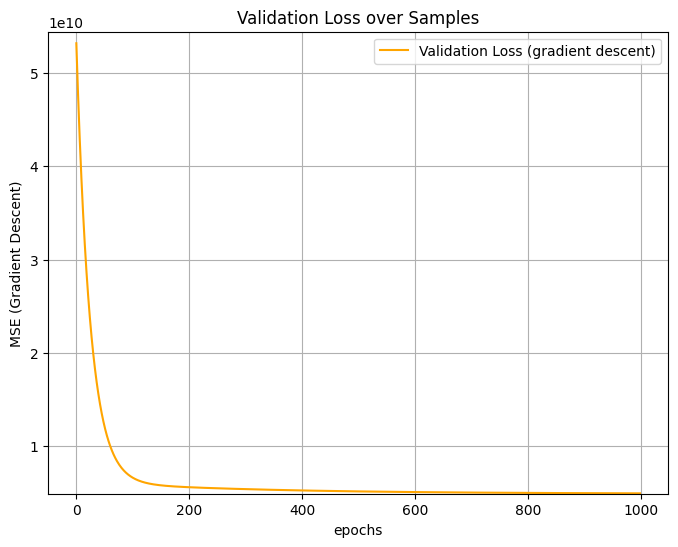

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(ValidationLoss)
plt.xlabel('epochs')
plt.ylabel('MSE (Gradient Descent)')
plt.title('Validation Loss over Samples')
plt.grid(True)
plt.gca().lines[0].set_color('orange')
plt.legend(['Validation Loss (gradient descent)'])

plt.ylim(min(min(ValidationLoss), min(l_)), max(max(ValidationLoss), max(l_)))
plt.show()

Look at Predictions

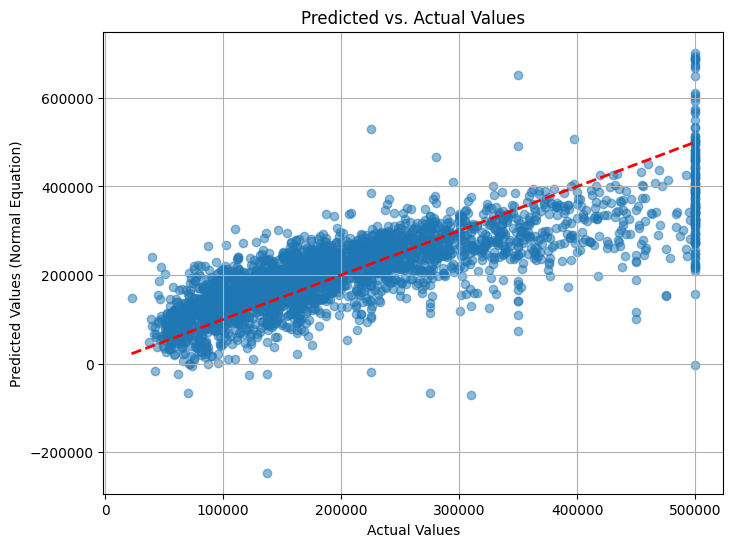

In [33]:
import matplotlib.pyplot as plt
y_pred = compute_function_normal(x_test,normal_weights)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2) 
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Normal Equation)')
plt.grid(True)
plt.show()

*Comparision of All Methods*

In [107]:
y_pred_normal = x_test@normal_weights
y_pred_gradient = x_test@gradient_weights

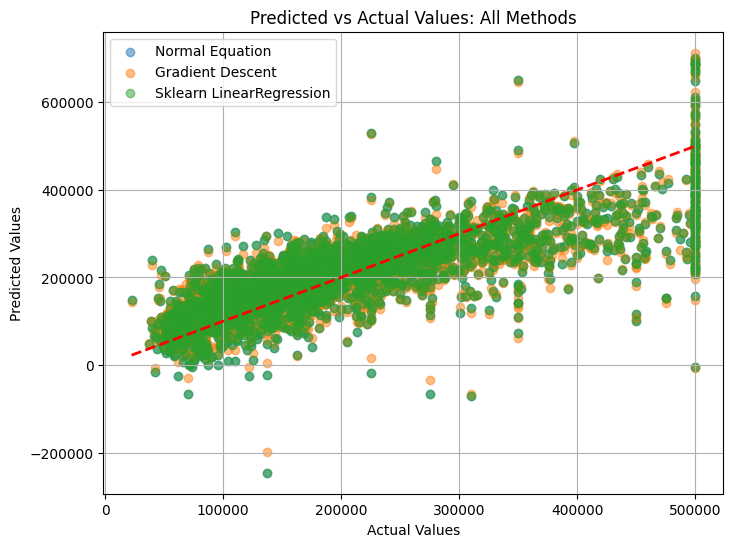

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_normal, alpha=0.5, label='Normal Equation')
plt.scatter(y_test, y_pred_gradient, alpha=0.5, label='Gradient Descent')
plt.scatter(y_test, lr.predict(x_scaled_test), alpha=0.5, label='Sklearn LinearRegression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values: All Methods')
plt.legend()
plt.grid(True)
plt.show()

*the models perform similarly*

The line at 500,000 is due to the cost being capped at that value. the linear regression model cannot model that non linearity

In [84]:
residuals = y_test - y_pred

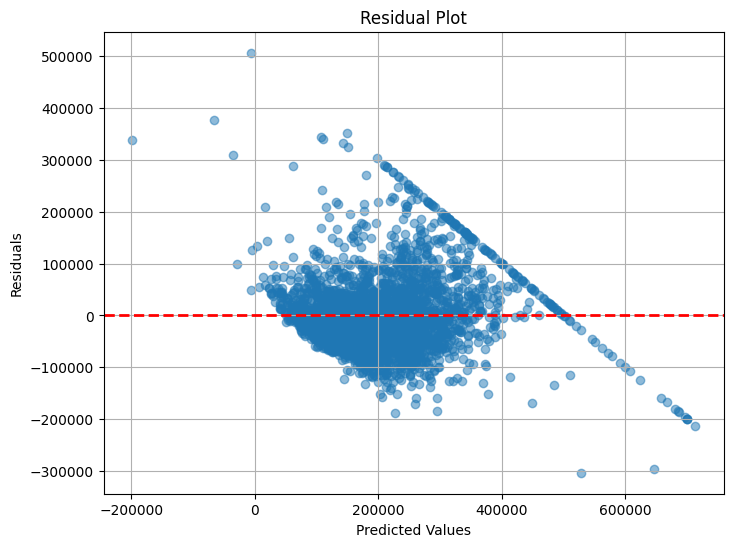

In [85]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--', lw=2)

# Add labels and a title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

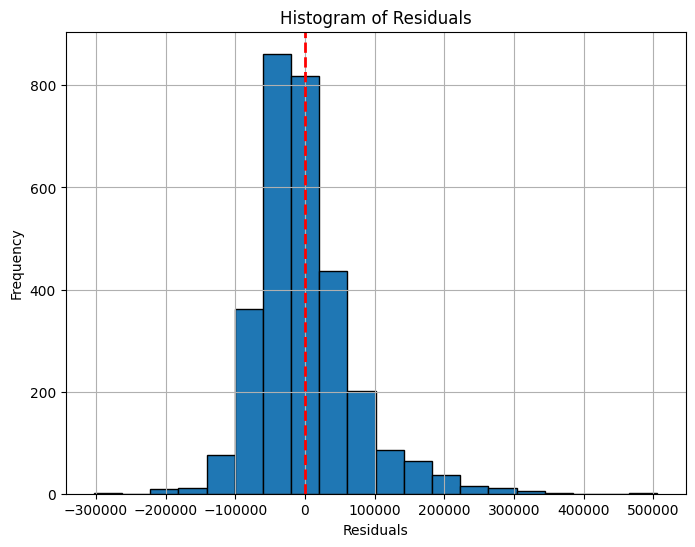

In [87]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black', alpha=1)

# Add a vertical line at x=0 for reference
plt.axvline(x=0, color='red', linestyle='--', lw=2)

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)

# Save the plot to a file
plt.savefig('residuals_histogram.png')

*Evaluation Metrics Functions*

In [102]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):

    return np.sqrt(mean_squared_error(y_true, y_pred))

def coefficient_of_determination(y_true, y_pred):

    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

Compute all evaluation metrics

In [ ]:
y_pred_normal = compute_function_normal(x_test, normal_weights)
y_pred_gradient = compute_function_normal(x_test, w)
y_pred_sklearn = lr.predict(x_scaled_test)


In [116]:
# Normal Equation Results
print("NORMAL EQUATION SOLUTION:")
mse_normal = mean_squared_error(y_test, y_pred_normal)
rmse_normal = root_mean_squared_error(y_test, y_pred_normal)
r2_normal = coefficient_of_determination(y_test, y_pred_normal)
mae_normal = mean_absolute_error(y_test, y_pred_normal)

print(f"MSE:        {mse_normal}")
print(f"RMSE:  {rmse_normal}")
print(f"R²: {r2_normal}")
print(f"MAE:       {mae_normal}")


NORMAL EQUATION SOLUTION:
MSE:        4886020526.85548
RMSE:  69900.07529935487
R²: 0.6180349003715605
MAE:       50669.44609099083


In [115]:
# Gradient Descent Results
mse_gradient = mean_squared_error(y_test, y_pred_gradient)
rmse_gradient = root_mean_squared_error(y_test, y_pred_gradient)
r2_gradient = coefficient_of_determination(y_test, y_pred_gradient)
mae_gradient = mean_absolute_error(y_test, y_pred_gradient)

print(f"MSE:        {mse_gradient}")
print(f"RMSE:  {rmse_gradient}")
print(f"R²: {r2_gradient}")
print(f"MAE:       {mae_gradient}")

MSE:        4941068528.343679
RMSE:  70292.73453454261
R²: 0.6137315178423188
MAE:       50938.06897623376


In [114]:

# Sklearn Results
print("SKLEARN LINEARREGRESSION SOLUTION:")
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
rmse_sklearn = root_mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = coefficient_of_determination(y_test, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)

print(f"MSE:        {mse_sklearn}")
print(f"RMSE:  {rmse_sklearn}")
print(f"R²: {r2_sklearn}")
print(f"MAE:       {mae_sklearn}")

SKLEARN LINEARREGRESSION SOLUTION:
MSE:        4886020526.85548
RMSE:  69900.07529935487
R²: 0.6180349003715606
MAE:       50669.44609099078


*Comparision of Results*

In all Normal Equation and Skit-learn perform similarly and slightly better than Gradient Descent but all are very close.